In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from task_io import TaskIO

# ===== Importing training and testing data =====
task_io = TaskIO(
    train='./data/train.csv',
    test='./data/test_XX.csv',
    result='./data/result.csv'
)
training_data = task_io.import_training_data()
testing_data = task_io.import_testing_data()

bias = 1.0147833662626948, weight = 0.7776396331574981


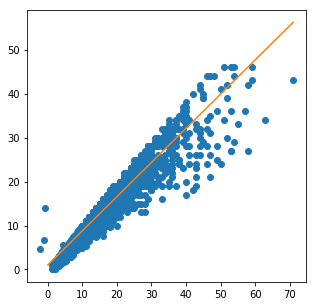

In [3]:
x = pd.Series()
y = pd.Series()

feature = training_data[training_data['測項'] == 'NOx'].loc[:, '0':'23'].apply(pd.to_numeric)
outcome = training_data[training_data['測項'] == 'NO2'].loc[:, '0':'23'].apply(pd.to_numeric)
for hour in feature:
    x = x.append(feature[hour].map(lambda elem: elem), ignore_index=True)
    y = y.append(outcome[hour].map(lambda elem: elem), ignore_index=True)

# ===== Fitting linear model =====
from linear_model import LinearRegression
model = LinearRegression()
model.fit(x.values, y.values)

xfit = np.linspace(0, feature.max().max(), 1000)
yfit = model.predict(xfit)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, y, 'o')
ax.plot(xfit, yfit)
plt.show()

Converged at iteration 26
bias = 1.0093733588782114, weight = 0.4820868493775198


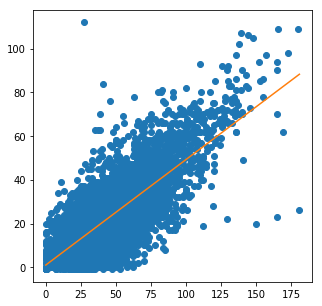

In [4]:
x = pd.Series()
y = pd.Series()

pm_25 = training_data[training_data['測項'] == 'PM2.5'].loc[:, '0':'23'].apply(pd.to_numeric)
feature = training_data[training_data['測項'] == 'PM10'].loc[:, '0':'23'].apply(pd.to_numeric)
outcome = pm_25
for hour in feature:
    x = x.append(feature[hour].map(lambda elem: elem), ignore_index=True)
    y = y.append(outcome[hour].map(lambda elem: elem), ignore_index=True)

# ===== Fitting linear model =====
model = LinearRegression()
model.fit(x.values, y.values)

xfit = np.linspace(0, feature.max().max(), 1000)
yfit = model.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, y, 'o')
ax.plot(xfit, yfit)

plt.show()